### **Nama : Fadlila Agustina**
### **NPM : 21083010050**
### **Machine Learning I (C)**
### **_______________________________________**

In [25]:
# mengimpor modul pandas sbg pd dan numpy sbg np
import pandas as pd
import numpy as np

In [26]:
# membaca file csv
df = pd.read_csv('diabetes.csv')
# memanggil dataframe yg telah dibaca
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# memunculkan 5 baris pertama pada dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# menampilkan tipe data dari masing-masing kolom
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
# mengubah jenis data pada kolom Outcome yg awalnya int64 menjadi category
df['Outcome'] = df['Outcome'].astype('category')
# menampilkan jenis data yang baru saja diubah
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [30]:
# menampilkan dimensi data atau jumlah baris dan kolom pada dataset
np.shape(df)

(768, 9)

In [31]:
# memeriksa apakah ada missing value pada tiap kolom
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [32]:
# mengimport modul preprocessing dari library scikit-learn
from sklearn import preprocessing
# membuat objek scaler utk normalisasi data dgn metode MinMaxScaler
TransformasiMinMax = preprocessing.MinMaxScaler()

In [33]:
# menyimpan nama kolom target atau var dependen dlm analisis data (Outcome)
target = 'Outcome'
# membuat dataframe baru x yg berisi semua kolom dr dataframe kecuali kolom Outcome
x = df.drop('Outcome', axis = 1)
# membuat pandas series yaitu variabel Outcome
y = df[target]
# membuat list dr nama kolom yg akan diproses dgn normalisasi MinMax
varx = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# utk mengaplikasikan normalisasi MinMaxScaler pada dataframe x pada kolom-kolom yg terdapat pada varx
x = pd.DataFrame(data = TransformasiMinMax.fit_transform(x), columns = varx)
# menampilkan hasil transformasi data yg telah diubah
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [34]:
# mengimport fungsi train_test_split dr modul model_selection pada library Scikit-learn
from sklearn.model_selection import train_test_split
# variabel yg akan menampung hasil pemisahan dataset menggunakan metode train_test_split
# parameter x dan y merepresentasikan data features dan target pada dataset 
# test_size menentukan ukuran data testing yg diinginkan dlm proporsi atau presentase (25%)
# random state merupakan parameter opsional yg digunakan utk mengatur angka acak
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

#### *Data Eksplorasi*

In [35]:
# menghitung jumlah kemunculan tiap nilai pada kolom Outcome
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

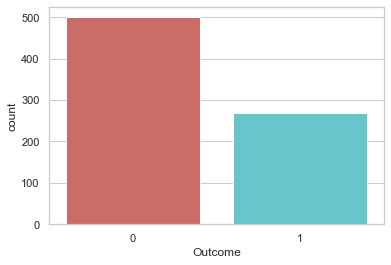

<Figure size 432x288 with 0 Axes>

In [36]:
# mengimport modul pyplot dr library matplotlib sebagai plt
import matplotlib.pyplot as plt
# mengimport library seaborn sebagai sns
import seaborn as sns
# menetapkan gaya visualisasi seaborn menjadi white dgn menggunakan fungsi set()
sns.set(style = "white")
# menetapkan gaya visualisasi seaborn menjadi whitegrid dgn menggunakan fungsi set()
# parameter color_codes = True digunakan agar kode warna pada seaborn bisa digunakan
sns.set(style = "whitegrid", color_codes = True)
# membuat countplot menggunakan seaborn dgn memasukkan dataframe, kolom Outcome sbg sumbu x dan hls sbg palet warna
sns.countplot(x = 'Outcome', data = df, palette = 'hls')
# menampilkan visualisasi yg telah dibuat menggunakan fungsi show()
plt.show()
# menyimpan gambar visualisasi
plt.savefig('count_plot')

In [37]:
# membuat var yg digunakan utk menampung data yg sudah dibagi
# x dan y adalah var yg berisi data yg akan dibagi
# test_size = 0.2 menunjukkan bahwa data test akan diambil sebanyak 20% dr total data
# random_state = 1 menunjukkan bahwa pengacakan data akan dilakukan dgn menggunakan bilangan acak awal yg bernilai 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#### *Regresi Logistik*

In [38]:
# mengimport kelas LogisticRegression dr library sklearn utk membuat regresi logistik
from sklearn.linear_model import LogisticRegression
# mengimport modul metrics dr library sklearn yg akan digunakan utk mengevaluasi performa model
from sklearn import metrics
# membuat objek LogReg yg merupakan instance dr kelas LogisticRegression
LogReg = LogisticRegression()
# objek LogReg akan belajar pola hubungan antara x_train dan y_train
LogReg.fit(x_train, y_train)

LogisticRegression()

In [39]:
# memanggil metode predict() pada objek LogReg yg akan digunakan utk memprediksi nilai y pada data test
y_pred = LogReg.predict(x_test)
# menampilkan akurasi dr model regresi logistik pada data test
# metode score() akan mengembalikan akurasi model pada data test
# format string {:.2f} akan menampilkan angka float dgn 2 angka di blkg koma
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [40]:
# mengimport fungsi confusion_matrix dari modul metrics pada library sklearn utk menghitung matriks konfusi
from sklearn.metrics import confusion_matrix
# memanggil fungsi confusion_matrix() dan menyimpan hasilnya pada var ConfusionMatrix
# fungsi ini membutuhkan 2 parameter, yaitu y_test dan y_pred
ConfusionMatrix = confusion_matrix(y_test, y_pred)
# menampilkan matriks konfusi yg sudah dihitung pada baris sblmnya
print(ConfusionMatrix)

[[91  8]
 [27 28]]


In [41]:
# mengimport fungsi classification_report dr modul metrics pada library sklearn utk menampilkan laporan klasifikasi
from sklearn.metrics import classification_report
# memanggil fungsi classification_report() dan menampilkan hasilnya
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        99
           1       0.78      0.51      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



#### *Naive Bayes*

In [42]:
# mengimport kelas GaussianNB dr modul naive_bayes pada library sklearn
from sklearn.naive_bayes import GaussianNB
# membuat objek gnb utk melatih model naive bayes dan melakukan prediksi pada data test
gnb = GaussianNB()
# memanggil metode fit() pada objek gnb utk melatih model naive bayes dgn data train
gnb.fit(x_train, y_train)

GaussianNB()

In [50]:
# memanggil metode predict() pada objek gnb yg akan digunakan utk memprediksi nilai y pada data test
y_pred = gnb.predict(x_test)
# menampilkan akurasi dr model naive bayes pada data test
# metode score() akan mengembalikan akurasi model pada data test
# format string {:.2f} akan menampilkan angka float dgn 2 angka di blkg koma
print('Accuracy of naive bayes on test set: {:.2f}'.format(gnb.score(x_test, y_test)))

Accuracy of naive bayes on test set: 0.77


In [44]:
# memanggil metode predict() pada objek gnb utk melakukan prediksi nilai var dependen pada x_test dan hasilnya akan disimpan ke var y_pred
y_pred = gnb.predict(x_test)
# memanggil fungsi classification_report() dan membutuhkan 2 parameter, yaitu y_test dan y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



#### *Decision Tree*

In [45]:
# mengimport kelas DecisionTreeClassifier dr modul tree pada library slearn
from sklearn.tree import DecisionTreeClassifier
# membuat objek clf yg digunakan utk melatih model decision tree dan melakukan prediksi pada data test
clf = DecisionTreeClassifier()
# memanggil metode fit() pada objek clf utk melatih model decision tree dgn data x_train dan y_train
clf = clf.fit(x_train, y_train)

In [46]:
# memanggil metode predict() pada objek clf utk melakukan prediksi nilai var dependen pada data x_test
y_pred = clf.predict(x_test)
# mencetak nilai akurasi dr model yg telah diuji dgn data test
# fungsi metrics.accuracy_score() digunakan utk menghitung akurasi antara 2 array (y_test dan y_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [47]:
# mencetak laporan klasifikasi dr model yg telah diuji dgn data test
# fungsi classification_report() digunakan utk menghitung dan mencetak precision, recall, f1-score, dan support utk tiap kelas pada dataset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        99
           1       0.55      0.49      0.52        55

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.64       154
weighted avg       0.67      0.68      0.67       154

